Visualising CNNs: The Class Appearance Model
====================================

In this example we will demonstrate the [ClassAppearanceModel](https://torchbearer.readthedocs.io/en/latest/code/callbacks.html#torchbearer.callbacks.imaging.inside_cnns.ClassAppearanceModel) callback included in torchbearer. This implements
one of the most simple (and therefore not always the most successful) deep visualisation techniques, discussed in the
paper [Deep Inside Convolutional Networks: Visualising Image Classification Models and Saliency Maps](https://arxiv.org/abs/1312.6034) 

Background
----------------------------------

The process to obtain Figure 1 from the paper is simple, given a particular target class $c$, we use
back-propagation to obtain

\begin{equation}
\arg\!\max_I \; S_c(I) - \lambda\Vert I \Vert_2^2\; ,
\end{equation}

where $S_c(I)$ is the un-normalised score of $c$ for the image $I$ given by the network. The
regularisation term $\Vert I \Vert_2^2$ is necessary to prevent the resultant image from becoming overly noisy.
More recent visualisation techniques use much more advanced regularisers to obtain smoother, more realistic images.

Imports
----------------------------

We will first import all the necessary packages for this example. We need torchvision nightly for this example to get the GoogLeNet model and have it work with Colab. This isn't necessary if you have torchvision v0.3.0 installed. 

In [5]:
import torch.nn as nn
!pip install torchvision-nightly

import torchvision
from torchvision import transforms

try:
  from torchbearer import Trial
except:
  !pip install torchbearer
  from torchbearer import Trial
import torchbearer.callbacks.imaging as imaging

     |████████████████████████████████| 81kB 5.2MB/s 


Loading the Model
----------------------------------------

Since we are just running the callback on a pre-trained model, we don't need to load any data in this example. Instead,
we use torchvision to load an Inception V1 trained on ImageNet with the following:

In [6]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.net = torchvision.models.googlenet(True)

    def forward(self, input):
        if input is not None:
            return self.net(input)

model = Model()

<class '__main__.Model'>


Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/checkpoints/googlenet-1378be20.pth
100%|██████████| 52147035/52147035 [00:01<00:00, 47309836.41it/s]


We need to include the `None` check as we will initialise the `Trial` without a dataloader, and so it will pass
`None` to the model forward.

Running with the Callback
---------------------------------------------

When using imaging callbacks, we commonly need to include an inverse transform to return the images to the right space.
For torchvision, ImageNet models we can use the following:

In [0]:
inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std=[1/0.229, 1/0.224, 1/0.225]
)

Finally we can construct and run the `Trial` with:

In [8]:
trial = Trial(model, callbacks=[
    imaging.ClassAppearanceModel(1000, (3, 224, 224), steps=10000, target=951, transform=inv_normalize)
              .on_val().to_file('lemon.png'),
    imaging.ClassAppearanceModel(1000, (3, 224, 224), steps=10000, target=968, transform=inv_normalize)
              .on_val().to_file('cup.png')
])
trial.for_val_steps(1).to('cuda')
trial.evaluate()

{}

Here we create two `ClassAppearanceModel` instances which target the `lemon` and `cup` classes respectively.
Since the `.ClassAppearanceModel` is an `ImagingCallback`, we use the imaging API to send each of these
to files. Finally, we evaluate the model for a single step to generate the results.

Results
---------------------------------------

The results for the above code are given below. There some shapes which resemble a lemon or cup, however, not to the
same extent shown in the paper. Because of the simplistic regularisation and objective, this model is highly sensitive
to hyper-parameter choices. These results could almost certainly be improved with some more careful selection.

'Lemon'

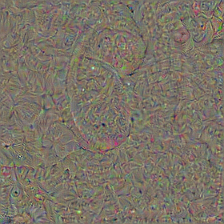

'Cup'

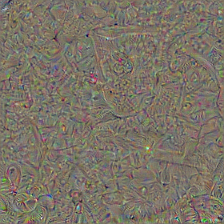

In [11]:
from IPython.display import Image, display
imgs = ['https://raw.githubusercontent.com/ecs-vlc/torchbearer/master/docs/_static/img/lemon.png', 'https://raw.githubusercontent.com/ecs-vlc/torchbearer/master/docs/_static/img/cup.png']
Image(imgs)
x = Image(imgs[0]) 
y = Image(imgs[1]) 
display("Lemon", x, "Cup",  y)
